In [2]:
#reconstruct the image using interpolation methods/functions
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.pylab as plt
from PIL import Image

In [3]:
img_name = "../data/sample_1.png" # rows=534  col=800
im = Image.open(img_name)   
im = np.array(im.convert('L'))
im

array([[144, 150, 145, ...,  97, 101, 106],
       [150, 144, 143, ...,  98, 100, 102],
       [142, 138, 140, ..., 101, 102, 102],
       ...,
       [  9,   5,  10, ...,  31,  82, 135],
       [ 10,   2,  11, ..., 143, 164, 152],
       [  8,   0,   7, ..., 142, 118,  69]], dtype=uint8)

In [4]:
# A meshgrid of pixel coordinate
nx, ny = im.shape[1], im.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
print(X, Y)

[[   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 ...
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]
 [   0    1    2 ... 1917 1918 1919]] [[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1277 1277 1277 ... 1277 1277 1277]
 [1278 1278 1278 ... 1278 1278 1278]
 [1279 1279 1279 ... 1279 1279 1279]]


10000
uint8


/tmp/ipykernel_56535/4259324727.py:19: RuntimeWarning: invalid value encountered in cast
  uint8_array = (int_im).astype(np.uint8)


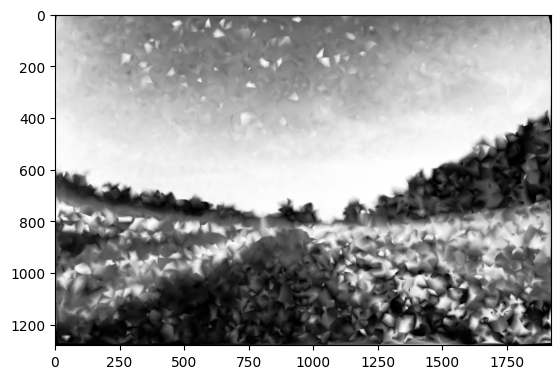

In [6]:
import cv2

i=2
nrows, ncols = 2,2
nsamples = 10**(i+2)
print(nsamples)
ix = np.random.randint(im.shape[1], size=nsamples)

iy = np.random.randint(im.shape[0], size=nsamples)

#select a subset of pixels 
samples = im[iy, ix]
int_im = griddata((iy,ix), samples, (Y,X))

plt.imshow(int_im, cmap=plt.get_cmap('Greys_r'))

# print(int_im.dtype)

uint8_array = (int_im).astype(np.uint8)

equ = cv2.equalizeHist(uint8_array)
print(uint8_array.dtype)
plt.imshow(equ, cmap=plt.get_cmap('Greys_r'))

In [ ]:
fig , ax = plt.subplot(2,2, figsize())

In [13]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms


reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference)

fig , (ax1,ax2,ax3) = plt.subplot(nrows=1, ncols=3, figsize=(8,3), sharex=True, sharey=True)


for aa in (ax1,ax2,ax3):
    aa.set_axis_off()

ax.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()



TypeError: subplot() got an unexpected keyword argument 'ncols' and/or 'nrows'.  Did you intend to call subplots()?

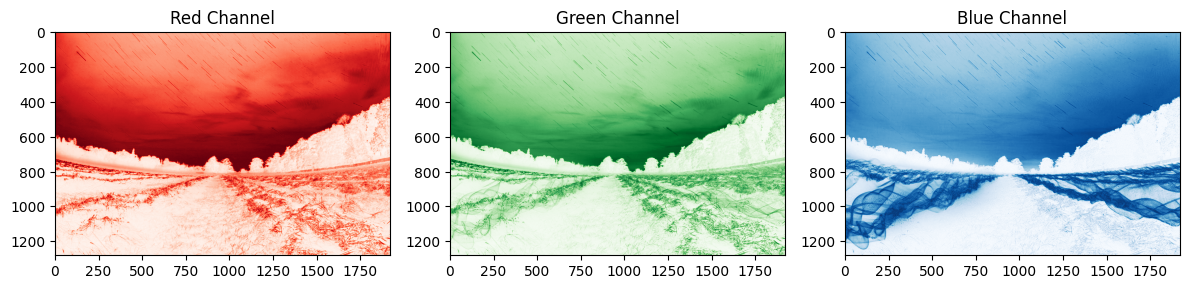

In [15]:
from PIL import Image
import matplotlib.pyplot as plt


image = Image.open("../data/sample_1.png")

red_channel , green_channel, blue_channel = image.split()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.imshow(red_channel, cmap='Reds')
ax1.set_title("Red Channel")

ax2.imshow(green_channel, cmap="Greens")
ax2.set_title("Green Channel")

ax3.imshow(blue_channel, cmap="Blues")
ax3.set_title("Blue Channel")

plt.tight_layout()
plt.show()


print(np.array(red_channel))

channels = (red_channel, green_channel, blue_channel)

rgb_image = Image.merge("RGB", channels)